In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
import string
import unicodedata
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import GridSearchCV

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
# Uploading dataset
movie_review = pd.read_csv("/content/Siva Narayana Reddy,Moview Reviews, Presentation of Project and Data Management Plan.csv")

In [17]:
movie_review.head()

,index,label,review
0,0,neg,how do films like mouse hunt get into theatres...
1,1,neg,some talented actresses are blessed with a dem...
2,2,pos,this has been an extraordinary year for austra...
3,3,pos,according to hollywood movies made in last few...
4,4,neg,my first press screening of 1998 and already i...


In [18]:
# Checking the shape of the dataset
movie_review.shape

(2000, 3)

In [19]:
# Dataset structure
movie_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2000 non-null   int64 
 1   label   2000 non-null   object
 2   review  1965 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [68]:
# Checking Missing Values
movie_review.isnull().sum()

,0
index,0
label,0
review,35


In [21]:
# Checking Duplicate values
movie_review.duplicated().sum()

0

In [22]:
movie_review.dropna(inplace = True)

In [66]:
# Checking Missing Values
print("After dropping null values")
movie_review.isnull().sum()

After dropping null values


,0
index,0
label,0
review,0
review_length,0


<Axes: xlabel='count', ylabel='label'>

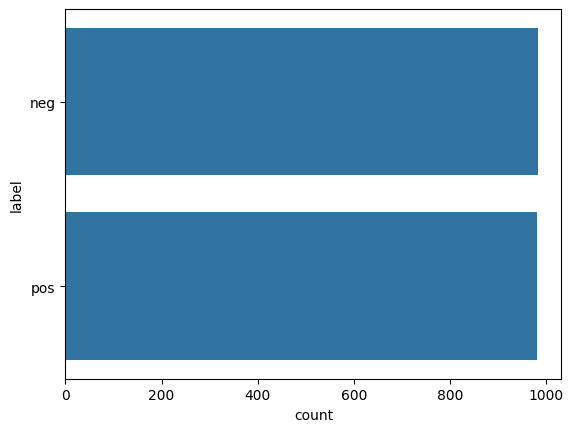

In [23]:
# Visualizing Labels distribution
sns.countplot(movie_review["label"])

In [36]:
def clean_text(text):
    # Remove HTML tags, if any
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs (optional step)
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove user mentions (optional step, e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Normalize Unicode characters to remove accents (optional step)
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords (optional, you can toggle this based on your task)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [37]:
movie_review['review'] = movie_review['review'].apply(clean_text)

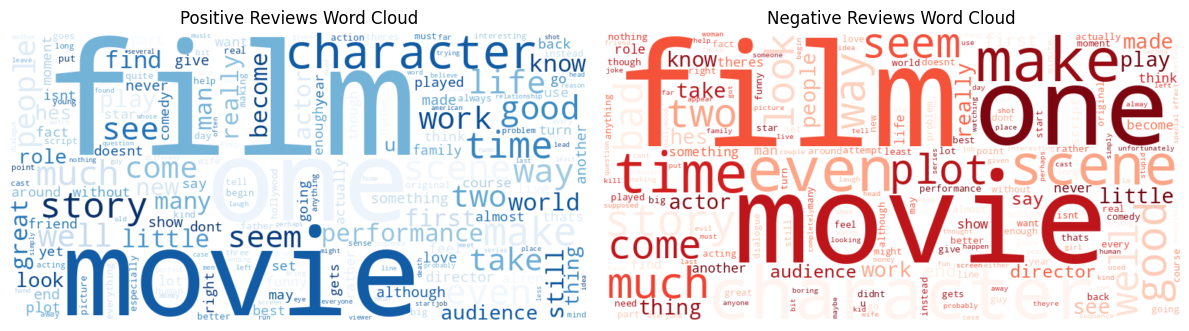

In [38]:
# Separate positive and negative reviews based on the label
positive_reviews = movie_review[movie_review['label'] == "pos"]['review']
negative_reviews = movie_review[movie_review['label'] == "neg"]['review']

# Combine all positive reviews into one string
positive_text = ' '.join(positive_reviews)

# Combine all negative reviews into one string
negative_text = ' '.join(negative_reviews)

# Create the word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)

# Create the word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-39-99775d58843e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="Blues_d")


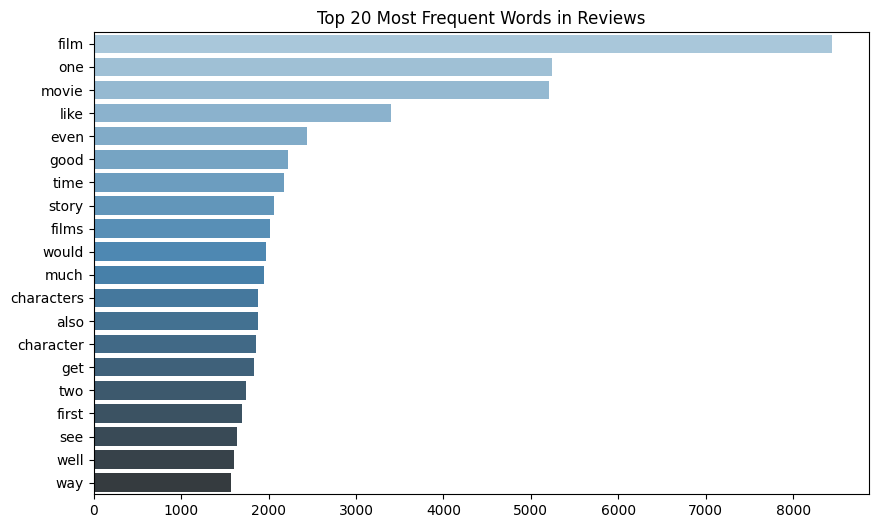

In [39]:
# Tokenize all reviews
all_reviews = ' '.join(movie_review['review'])
word_tokens = all_reviews.split()

# Get the most common words
word_freq = Counter(word_tokens)

# Visualize the top 20 most common words
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=words, palette="Blues_d")
plt.title('Top 20 Most Frequent Words in Reviews')
plt.show()

In [40]:
X = movie_review['review']  # Features (review text)
y = movie_review['label']

In [41]:
encode = LabelEncoder()

y = encode.fit_transform(y)

In [42]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Perform TF-IDF vectorization on the training and test data
tfidf = TfidfVectorizer(max_features=5000)

In [44]:
# Fit the TF-IDF vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)  # Train the Decision Tree model

DecisionTreeClassifier(random_state=42)

In [48]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

In [49]:
# Accuracy scores
rf_accuracy = accuracy_score(y_test, y_pred_rf)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [50]:
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Random Forest Accuracy: 0.76
Decision Tree Accuracy: 0.57


In [51]:
# Detailed classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Detailed classification report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       202
           1       0.81      0.67      0.73       191

    accuracy                           0.76       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.77      0.76      0.76       393


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       202
           1       0.56      0.52      0.54       191

    accuracy                           0.57       393
   macro avg       0.57      0.57      0.57       393
weighted avg       0.57      0.57      0.57       393



In [52]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

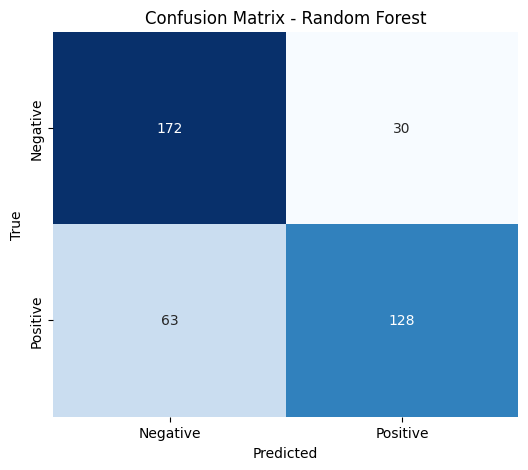

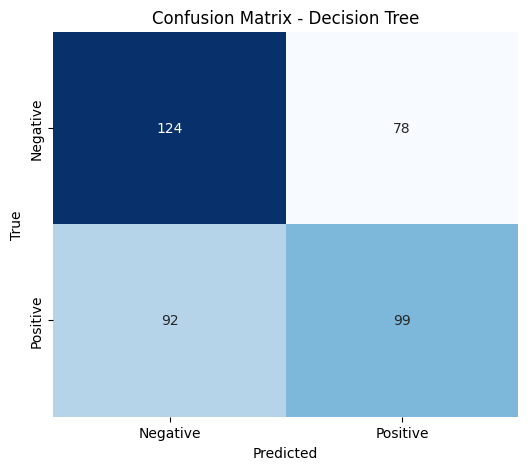

In [55]:
# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix for both models
plot_confusion_matrix(rf_conf_matrix, 'Random Forest')
plot_confusion_matrix(dt_conf_matrix, 'Decision Tree')

In [57]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest Classifier
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=3,  # 3-fold cross-validation
                              verbose=2,
                              n_jobs=-1,  # Use all processors
                              scoring='accuracy')

# Fit the grid search on the training data
rf_grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from Grid Search
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [58]:
# Evaluate the performance of the tuned Random Forest model
y_pred_rf_tuned = rf_grid_search.predict(X_test_tfidf)

# Confusion Matrix and Classification Report for Random Forest
rf_conf_matrix_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("\nRandom Forest - Classification Report (Tuned):")
print(classification_report(y_test, y_pred_rf_tuned))


Random Forest - Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       202
           1       0.81      0.73      0.77       191

    accuracy                           0.79       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [60]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Decision Tree Classifier
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              cv=3,  # 3-fold cross-validation
                              verbose=2,
                              n_jobs=-1,  # Use all processors
                              scoring='accuracy')

# Fit the grid search on the training data
dt_grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from Grid Search
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [63]:
# Evaluate the performance of the tuned Decision Tree model
y_pred_dt_tuned = dt_grid_search.predict(X_test_tfidf)

# Confusion Matrix and Classification Report for Decision Tree
dt_conf_matrix_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
print("\nDecision Tree - Classification Report (Tuned):")
print(classification_report(y_test, y_pred_dt_tuned))


Decision Tree - Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       202
           1       0.58      0.59      0.58       191

    accuracy                           0.59       393
   macro avg       0.59      0.59      0.59       393
weighted avg       0.59      0.59      0.59       393



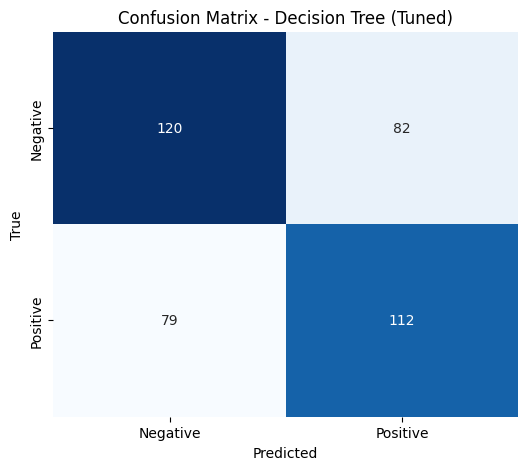

In [64]:
# Plot the Confusion Matrix for Decision Tree
plot_confusion_matrix(dt_conf_matrix_tuned, 'Decision Tree (Tuned)')

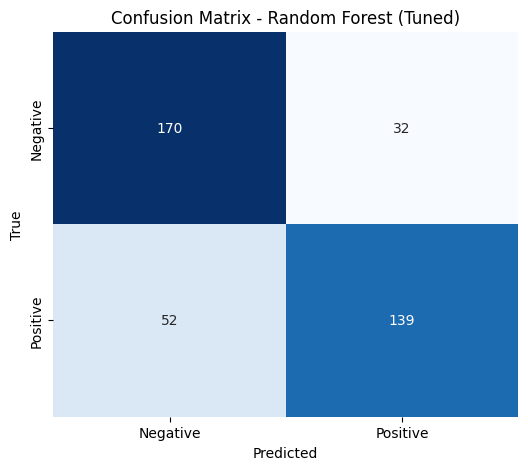

In [59]:
# Plot the confusion matrix for the tuned Random Forest model
plot_confusion_matrix(rf_conf_matrix_tuned, 'Random Forest (Tuned)')